**Imports**

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os

**Load in the Data**

In [6]:
dir_data = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Junior Physics Lab\\Fall 2021\\Experiment Sequences\\Relativistic Dynamics\\Data'

In [7]:
os.chdir(dir_data)

In [8]:
os.listdir()

['Barium 133 Calibrations',
 'beta_vs_B.xlsx',
 'count_rate_maximizing_voltages.xlsx',
 'Day 10',
 'Day 11',
 'Day 8',
 'Day 9',
 '~$beta_vs_B.xlsx']

In [9]:
df = pd.read_excel('beta_vs_B.xlsx')

In [12]:
df

,B (Gauss),B Uncertainty,Voltage (kV)
0,70.0,0.1,2.4
1,80.0,0.1,2.9
2,90.0,0.2,3.4
3,100.1,0.2,4.0
4,109.9,0.1,4.5
5,119.1,0.1,5.0


In [13]:
# get the columuns
bfield = df['B (Gauss)']
buncert = df['B Uncertainty']
voltage = df['Voltage (kV)']

In [37]:
# convert to numpy arrays
bfield = np.array(bfield)
buncert = np.array(buncert)
voltage = 1000*np.array(voltage)

**Compute Relevant Quantities**

The Electric Field $E=\frac{V}{d}$

In [38]:
# get the plate separation (m)
x = 0.0018
dx = 0.00003

In [39]:
# divide voltage by separation
efield = voltage/x
euncert = 0.0167*efield

In [40]:
efield

array([1333333.33333333, 1611111.11111111, 1888888.88888889,
       2222222.22222222, 2500000.        , 2777777.77777778])

In [41]:
euncert

array([22266.66666667, 26905.55555556, 31544.44444444, 37111.11111111,
       41750.        , 46388.88888889])

Beta $\beta=\frac{E}{B}$

In [42]:
beta = efield/bfield

In [43]:
percent_error = euncert/efield + buncert/bfield

# multiply pointwise by beta vals
beta_uncert = np.multiply(percent_error, beta)

**Plot the Data**

Setup Parameters

In [44]:
# plotting parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

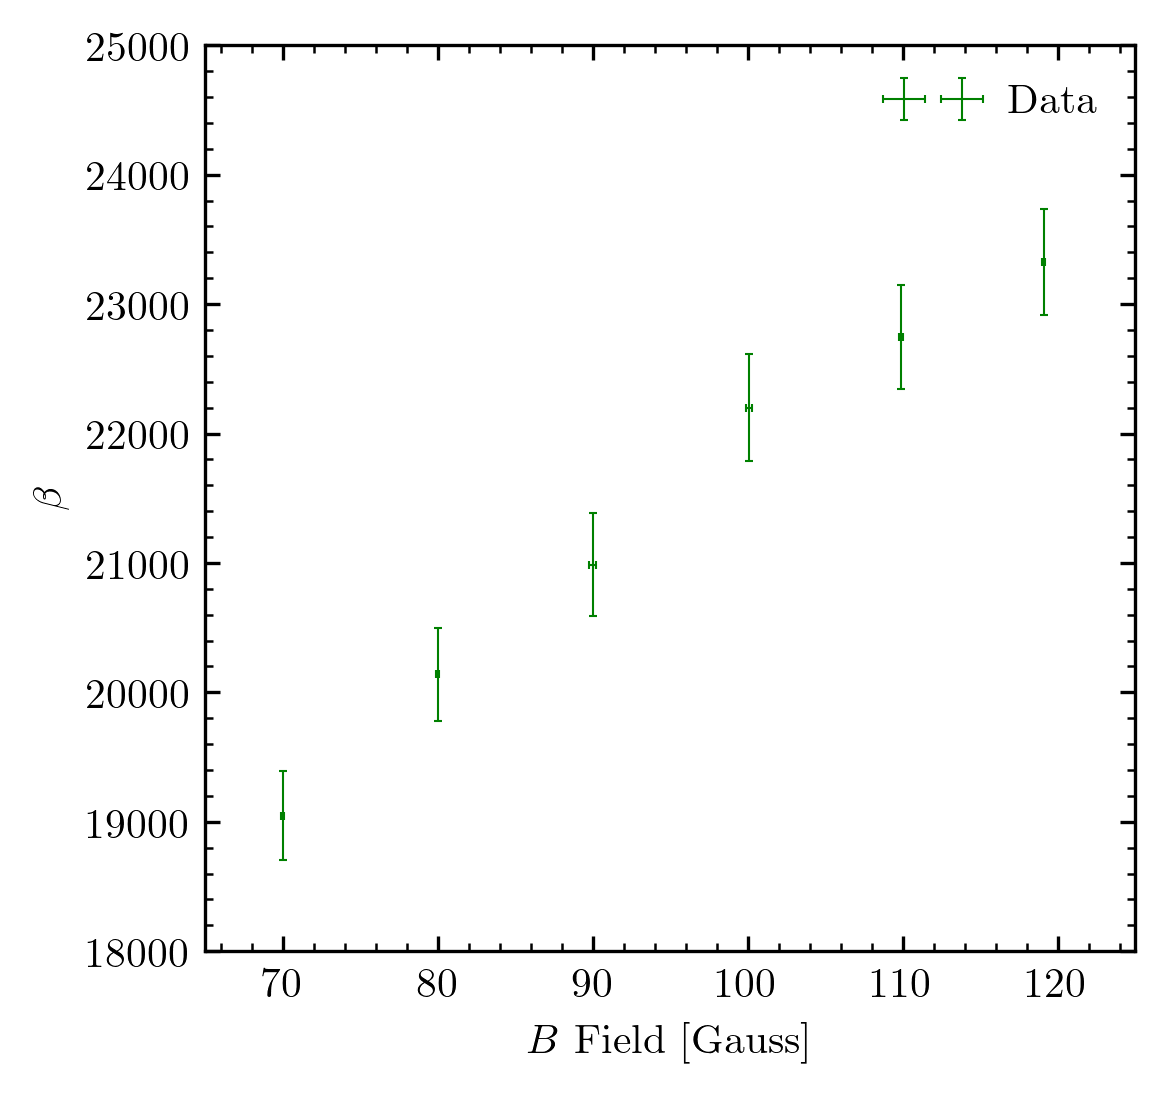

In [60]:
# plot of beta vs B-field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(65,125), ylim=(18000,25000), 
                         xlabel='$B$ Field [Gauss]', ylabel=r'$\beta$')

# data
ax.errorbar(bfield, beta, xerr=buncert, yerr=beta_uncert, label='Data', color='green', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

Text(0, 0.5, 'y label')

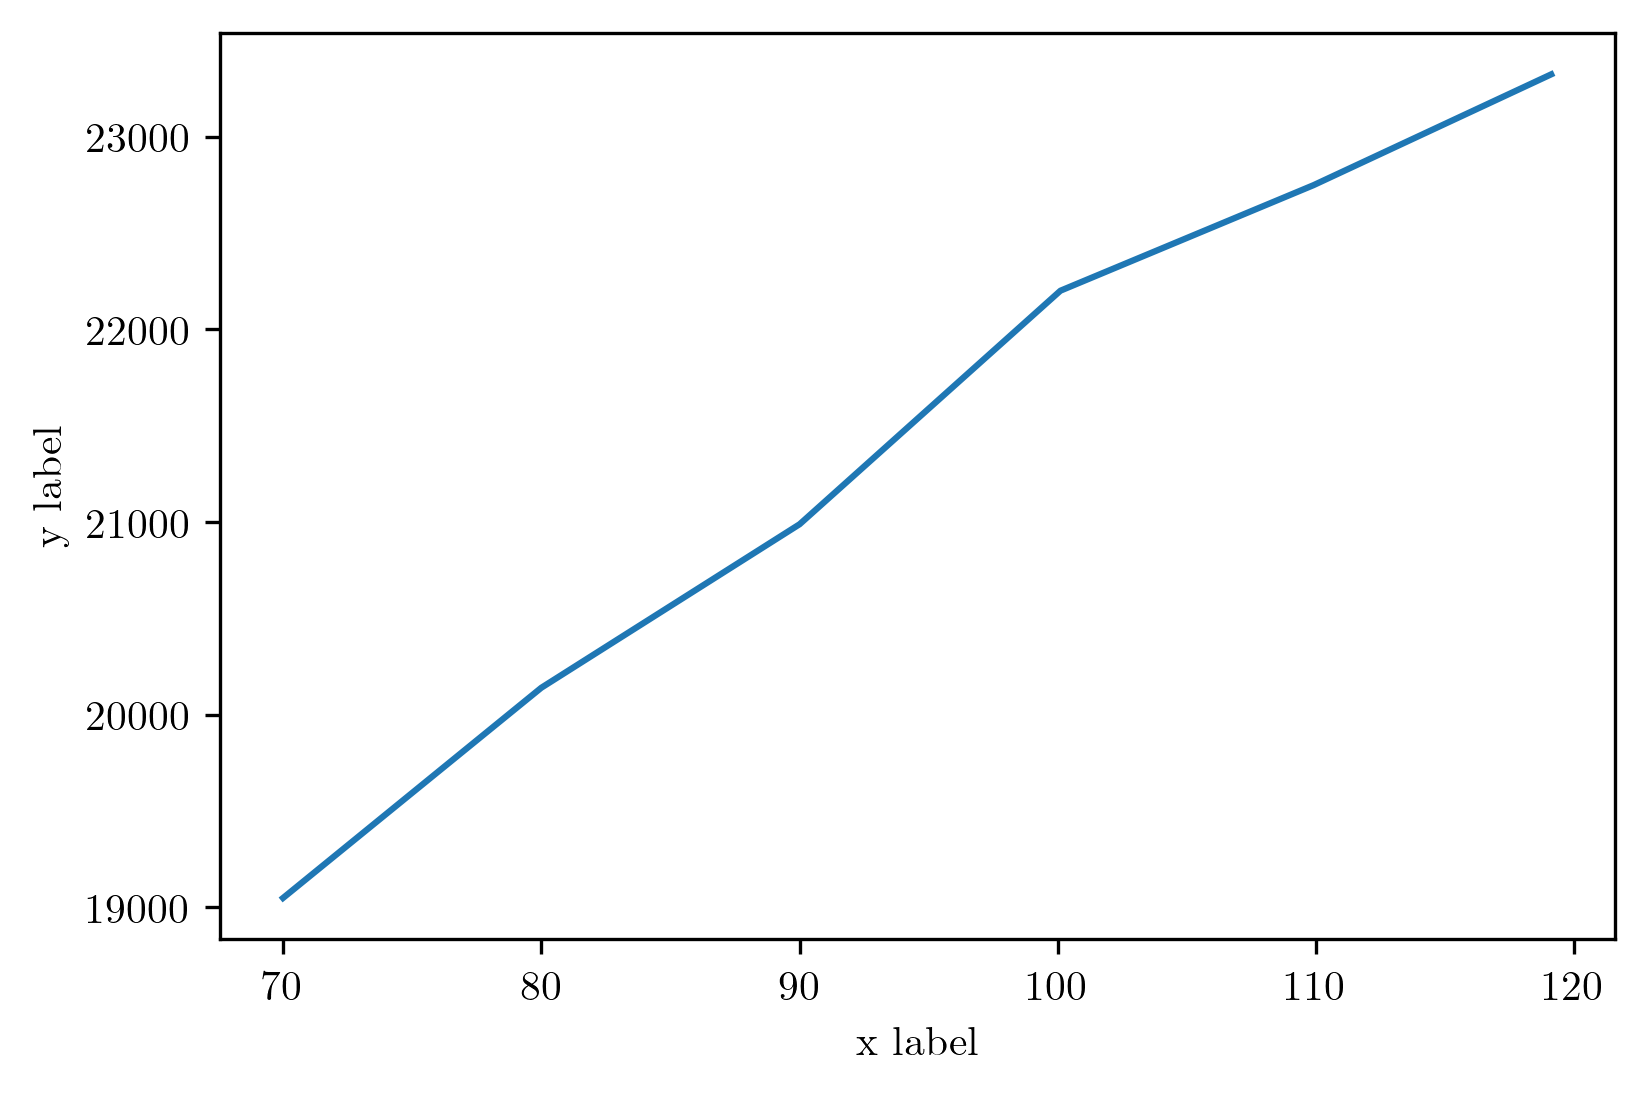

In [63]:
plt.plot(bfield, beta)
plt.xlabel('x label')
plt.ylabel('y label')